# 선형 회귀 (Linear Regression)
* 널리 사용되는 대표적인 회귀 알고리즘입니다. 
* 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘
* 선형이란 말에서 짐작할 수 있듯이 특성이 하나인 어떤 직선을 학습하는 알고리즘

### KNN 회귀 알고리즘의 한계

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

* 길이 50cm, 100cm인 농어 무게 예측 그래프

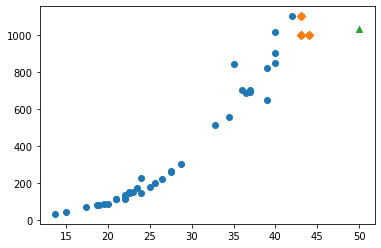

In [5]:
# 길이 50cm 농어의 이웃 정보
distances_50, indexes_50 = knr.kneighbors([[50]])

# 길이 50cm 농어의 예측 무게
pred_50 = knr.predict([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플의 산점도 (주황색 다이아몬드)
plt.scatter(train_input[indexes_50], train_target[indexes_50], marker='D')
# 50cm 농어 데이터
plt.scatter(50, pred_50, marker='^')

plt.show()

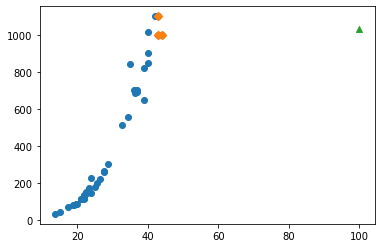

In [6]:
# 길이 100cm 농어의 이웃 정보
distances_100, indexes_100 = knr.kneighbors([[100]])

# 길이 100cm 농어의 예측 무게
pred_100 = knr.predict([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes_100], train_target[indexes_100], marker='D')
plt.scatter(100, pred_100, marker='^')
plt.show()

* 주변 데이터를 기반으로 예측하는 KNN 회귀의 한계점
    * 길이가 50cm인 농어와 100cm인 농어의 무게 예측값이 동일하게 나온다.
    * 길이 100cm인 농어의 무게는 훨씬 무거울 것이기 때문에 올바르게 예측하지 못했다.

In [7]:
print('길이 50cm 농어의 무게 예측값: {}'.format(knr.predict([[50]])[0]))
print('길이 100cm 농어의 무게 예측값: {}'.format(knr.predict([[100]])[0]))

길이 50cm 농어의 무게 예측값: 1033.3333333333333
길이 100cm 농어의 무게 예측값: 1033.3333333333333


### 선형회귀 사용 (KNN의 한계점을 해결)
* LinearRegression 클래스로 구현

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# LinearRegression 모델 생성
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [10]:
# 길이 50cm 농어에 대한 예측
print("길이 50cm 농어의 무게 예측값: {}".format(lr.predict([[50]])))


길이 50cm 농어의 무게 예측값: [1241.83860323]


In [11]:
# 선형 모델의 기울기, y절편
print("기울기: {},  y절편: {}".format(lr.coef_, lr.intercept_))

기울기: [39.01714496],  y절편: -709.0186449535477


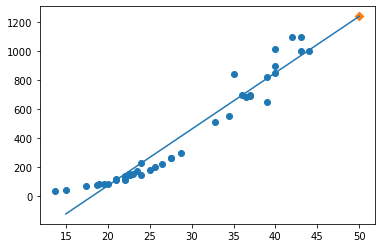

In [12]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_ , 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='D')

plt.show()

* $R^2$ 점수 확인

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항 회귀 (Polynomial regression)
* 단순 선형 회귀가 만든 직성이 왼쪽 아래로 쭉 뻗어 있어서 위 직선대로 예측하면, 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수 없는 일이다
* 왼쪽 위로 조금 구부러진 곡선을 생각해보자
* 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.

In [14]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [17]:
print("계수: {},  y절편: {}".format(lr.coef_, lr.intercept_))

계수: [  1.01433211 -21.55792498],  y절편: 116.05021078278259


* 무게 = 1.01 * 길이$^2$ - 21.6 * 길이 + 116.05
* 이런 방정식을 다항식(polynomial)이라고 부르며, 다항식을 사용한 선형 회귀를 다항 회귀(polynomial regression)라고 부른다 

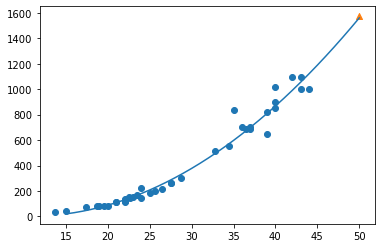

In [18]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 51)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')

plt.show()

* $R^2$ 점수 확인

In [19]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
